In [1]:
import cv2

In [2]:
print("Hello")

Hello


In [1]:
import tkinter
import cv2
import PIL.Image, PIL.ImageTk
import time 

class App:
    def __init__(self, window, window_title, video_source_start, ncamlist):
        self.window = window
        self.window.title(window_title)
        self.ncam = ncam
        self.vid = {}
        self.ret = {}
        self.frame = {}
        self.e = {}
        self.video_source_start = video_source_start
        self.photo = {}
        self.imgtemp = {}
        
        #for i in range(0, video_source_start+ncam):
            #self.video_source = video_source
        # Add labels inside the software such that the camera takes input positions from the fields.
        # 3x3 grid
        col1 = [1, 2, 3, 1, 2, 3, 1, 2, 3] 
        row1 = [1, 1, 1, 3, 3, 3, 5, 5, 5] 
        row2 = [0, 0, 0, 2, 2, 2, 4, 4, 4]
        colspan = [1, 1, 1, 1, 1, 1, 1, 1, 1]
        for i in range(video_source_start, ncam):
            self.e[str(i)] = tkinter.Entry(self.window, width = 35, borderwidth = 5)
            self.e[str(i)].grid(row = row1[i] , column = col1[i], columnspan = colspan[i])
            self.e[str(i)].insert("end",i)
            #self.e[str(i)].pack()
        
      # open video source (by default this will try to open the computer webcam)
        for i in range(video_source_start, ncam):
            self.vid[str(i)] = MyVideoCapture(i)
        self.vid[''] = self.vid['0']  
          
      
                
      # Create a canvas that can fit the above video source size
        #self.canvas = tkinter.Canvas(window, width = self.vid['0'].width, height = self.vid['0'].height)
        self.canvas = tkinter.Canvas(window, width = 750, height = 750)
        self.canvas.grid(row = 0, column = 0)
        #self.canvas.pack()
        
       # Button that lets the user take a snapshot
        self.btn_snapshot=tkinter.Button(window, text="Snapshot", width=50, command=self.snapshot)
        #self.btn_snapshot.pack(anchor=tkinter.CENTER, expand=True)
        self.btn_snapshot.grid(row =6, column = 1, columnspan = 3 )
       # After it is called once, the update method will be automatically called every delay milliseconds
        self.delay = 15
        self.update()
        self.window.mainloop()

    def snapshot(self):
        # Get a frame from the video source
        for i in range(self.video_source_start, self.video_source_start+self.ncam):
            self.ret[str(i)], self.frame[str(i)] = self.vid[str(i)].get_frame()
            
        for i in range(self.video_source_start, self.video_source_start+self.ncam):
            if self.ret[str(i)]:
                cv2.imwrite("frame"+str(i)+ time.strftime("%d-%m-%Y-%H-%M-%S") + ".jpg", cv2.cvtColor(self.frame[str(i)], cv2.COLOR_RGB2BGR))
            

    def update(self):
        # Get a frame from the video source
        
        x = [0, 250, 500, 0, 250, 500, 0, 250, 500]
        y = [0, 0, 0, 250, 250, 250, 500, 500, 500]
        
        for i in range(self.video_source_start,self.video_source_start+self.ncam):
            self.ret[str(i)], self.frame[str(i)] = self.vid[self.e[str(i)].get()].get_frame()
        imgtemp = {}
        for i in range(self.video_source_start,self.video_source_start+self.ncam):
            
            if self.ret[str(i)]:
                self.imgtemp[str(i)] = PIL.Image.fromarray(self.frame[str(i)])
                self.imgtemp[str(i)] = self.imgtemp[str(i)].resize((250, 250), PIL.Image.ANTIALIAS)
                self.photo[str(i)] = PIL.ImageTk.PhotoImage(image = self.imgtemp[str(i)])
                #self.photo = self.photo.resize((250, 250), Image.ANTIALIAS)
                self.canvas.create_image(x[i], y[i], image = self.photo[str(i)], anchor = tkinter.NW)
        
        self.window.after(self.delay, self.update)
 
 
class MyVideoCapture:
     def __init__(self, video_source):
        # Open the video source
        self.vid = cv2.VideoCapture(video_source)
        if not self.vid.isOpened():
             raise ValueError("Unable to open video source", video_source)
 
        # Get video source width and height
        self.width = self.vid.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.height = self.vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
 
     def get_frame(self):
        if self.vid.isOpened():
            ret, frame = self.vid.read()
            if ret:
                # Return a boolean success flag and the current frame converted to BGR
                return (ret, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            else:
                return (ret, None)
        else:
             return (ret, None)
 
     # Release the video source when the object is destroyed
     def __del__(self):
        if self.vid.isOpened():
            self.vid.release()
 
 # Create a window and pass it to the Application object

In [11]:
App(tkinter.Tk(), "Brain Cam",0,2)

NameError: name 'ncam' is not defined

In [3]:
import cv2
listport = []
camlist = []
for i in range(0, 22):
    cam=cv2.VideoCapture(i)
    
    if cam.isOpened():
        listport.append(i)
        camlist.append(cam)
    cam.release()
print("The availale ports are: {} and listed below...".format(len(listport)))
print(str(listport))


The availale ports are: 0 and listed below...
[]


[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video2): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video3): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video4): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_

In [2]:
listport

[1, 5]

In [3]:
cam

<VideoCapture 0x7f73de3c3410>

In [4]:
camlist

[<VideoCapture 0x7f73de3c3430>, <VideoCapture 0x7f73de3c3470>]

# Final Multi Camera Capture

## Code to get the available ports (currently on)
Note that you should quickly close the camera ports after capturing as the camera heat up pretty quickly

In [1]:
import cv2
listport = []
camlist = []
for i in range(0, 22):
    cam=cv2.VideoCapture(i)
    
    if cam.isOpened():
        listport.append(i)
        camlist.append(cam)
    cam.release()
print("The availale ports are: {} and listed below...".format(len(listport)))
print(str(listport))


[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video3): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video5): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video7): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video9): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_

The availale ports are: 9 and listed below...
[0, 2, 4, 6, 8, 10, 12, 14, 16]


[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video15): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video17): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video18): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video19): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video20): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libop

In [3]:
listport

NameError: name 'listport' is not defined

In [ ]:
camlist

In [2]:
import tkinter
import cv2
import PIL.Image, PIL.ImageTk
import time 

class App:
    def __init__(self, window, window_title, video_source_start, ncam, ncamlist):
        self.window = window
        self.window.title(window_title)
        self.ncam = ncam
        self.vid = {}
        self.ret = {}
        self.frame = {}
        self.e = {}
        #self.video_source_start = video_source_start
        self.photo = {}
        self.imgtemp = {}
        self.ncamlist = ncamlist
        
        #for i in range(0, video_source_start+ncam):
            #self.video_source = video_source
        # Add labels inside the software such that the camera takes input positions from the fields.
        # 3x3 grid
        col1 = [1, 2, 3, 1, 2, 3, 1, 2, 3] 
        row1 = [1, 1, 1, 3, 3, 3, 5, 5, 5] 
        row2 = [0, 0, 0, 2, 2, 2, 4, 4, 4]
        colspan = [1, 1, 1, 1, 1, 1, 1, 1, 1]
        for i in range(len(self.ncamlist)):
            self.e[str(i)] = tkinter.Entry(self.window, width = 35, borderwidth = 5)
            self.e[str(i)].grid(row = row1[i] , column = col1[i], columnspan = colspan[i])
            self.e[str(i)].insert("end",i)
            #self.e[str(i)].pack()
        
      # open video source (by default this will try to open the computer webcam)
        for i in range(len(self.ncamlist)):
            self.vid[str(i)] = MyVideoCapture(self.ncamlist[i])
        #self.vid[''] = self.vid['0']  
          
      
                
      # Create a canvas that can fit the above video source size
        #self.canvas = tkinter.Canvas(window, width = self.vid['0'].width, height = self.vid['0'].height)
        self.canvas = tkinter.Canvas(window, width = 750, height = 750)
        self.canvas.grid(row = 0, column = 0)
        #self.canvas.pack()
        
       # Button that lets the user take a snapshot
        self.btn_snapshot=tkinter.Button(window, text="Snapshot", width=50, command=self.snapshot)
        #self.btn_snapshot.pack(anchor=tkinter.CENTER, expand=True)
        self.btn_snapshot.grid(row =6, column = 1, columnspan = 3 )
       # After it is called once, the update method will be automatically called every delay milliseconds
        self.delay = 15
        self.update()
        self.window.mainloop()

    def snapshot(self):
        # Get a frame from the video source
        for i in range(len(self.ncamlist)):
            self.ret[str(i)], self.frame[str(i)] = self.vid[str(i)].get_frame()
            
        for i in range(len(self.ncamlist)):
            if self.ret[str(i)]:
                cv2.imwrite("frame"+str(i)+ time.strftime("%d-%m-%Y-%H-%M-%S") + ".jpg", cv2.cvtColor(self.frame[str(i)], cv2.COLOR_RGB2BGR))
            

    def update(self):
        # Get a frame from the video source
        
        x = [0, 250, 500, 0, 250, 500, 0, 250, 500]
        y = [0, 0, 0, 250, 250, 250, 500, 500, 500]
        
        for i in range(len(self.ncamlist)):
            self.ret[str(i)], self.frame[str(i)] = self.vid[self.e[str(i)].get()].get_frame()
        imgtemp = {}
        for i in range(len(self.ncamlist)):
            
            if self.ret[str(i)]:
                self.imgtemp[str(i)] = PIL.Image.fromarray(self.frame[str(i)])
                self.imgtemp[str(i)] = self.imgtemp[str(i)].resize((250, 250), PIL.Image.ANTIALIAS)
                self.photo[str(i)] = PIL.ImageTk.PhotoImage(image = self.imgtemp[str(i)])
                #self.photo = self.photo.resize((250, 250), Image.ANTIALIAS)
                self.canvas.create_image(x[i], y[i], image = self.photo[str(i)], anchor = tkinter.NW)
        
        self.window.after(self.delay, self.update)
 
 
class MyVideoCapture:
     def __init__(self, video_source):
        # Open the video source
        self.vid = cv2.VideoCapture(video_source)
        #if not self.vid.isOpened():
             #raise ValueError("Unable to open video source", video_source)
 
        # Get video source width and height
        self.width = self.vid.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.height = self.vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
 
     def get_frame(self):
        if self.vid.isOpened():
            ret, frame = self.vid.read()
            if ret:
                # Return a boolean success flag and the current frame converted to BGR
                return (ret, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            else:
                return (ret, None)
        else:
             return (ret, None)
 
     # Release the video source when the object is destroyed
     def __del__(self):
        if self.vid.isOpened():
            self.vid.release()
 
 # Create a window and pass it to the Application object

In [2]:
listport = [0,2,4,6,8,10,12,14]

In [4]:
App(tkinter.Tk(), "Brain Cam",0,9,listport)

[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video2): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video4): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video6): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1630689583740/work/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video8): can't open camera by index
[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_

UnboundLocalError: local variable 'ret' referenced before assignment

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
ret = []
frame = []
retframtup = []
nstart = 0
ncam = 1
cam = []

ctemp = np.zeros([256, 256])

for i in range(nstart,nstart+ncam):

    cam.append(cv2.VideoCapture(-3))


while(True):

    for i in range(0, ncam):

        strname = "cam_{}".format(str(i))

        if list(cam[i].read())[0] == False:

            cv2.imshow("feed_unavailable", ctemp)


        else:
            cv2.imshow(strname, list(cam[i].read())[1])

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


for i in range(0, ncam):
    cam[i].release()

cv2.destroyAllWindows()


In [8]:
import cv2
vid = cv2.VideoCapture(6)

In [9]:
# import cv2

# vid = cv2.VideoCapture(1)

while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [16]:
!id -a

uid=1000(vinayak) gid=1000(vinayak) groups=1000(vinayak),4(adm),24(cdrom),27(sudo),30(dip),46(plugdev),120(lpadmin),131(lxd),132(sambashare)


In [19]:
cam

[<VideoCapture 0x7f198edde910>]

In [20]:
cam[0].read()

(False, None)

In [1]:
cam1 = cv2.VideoCapture(-1)

NameError: name 'cv2' is not defined

In [22]:
cam1

<VideoCapture 0x7f3fce58be30>

In [23]:
cam1.read()

(False, None)

In [11]:
a = cam1.read()

In [16]:
a[1].shape

(480, 640, 3)

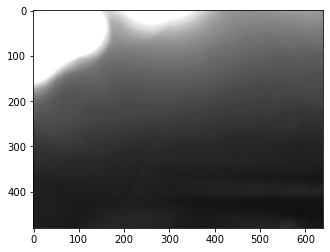

In [17]:
import matplotlib.pyplot as plt
plt.imshow(a[1])

In [18]:
cam1.release()